# IMPORTING NECESSARY LIBRARIES


In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import random
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN,LSTM , Dense, Dropout , BatchNormalization
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.initializers import Constant
from transformers import BertTokenizer, TFAutoModel
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# DATA EXPLORATION

In [ ]:
file_path="/content/drive/MyDrive/NEWS_CATEGORY/IMDB Dataset.csv"
df = pd.read_csv(file_path)
df


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   review              50000 non-null  object 
 1   sentiment           50000 non-null  object 
 2   processed_review    50000 non-null  object 
 3   sentiment_compound  50000 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.5+ MB


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


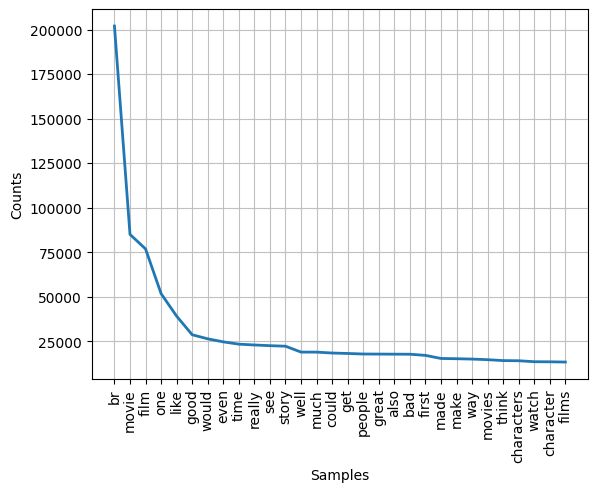

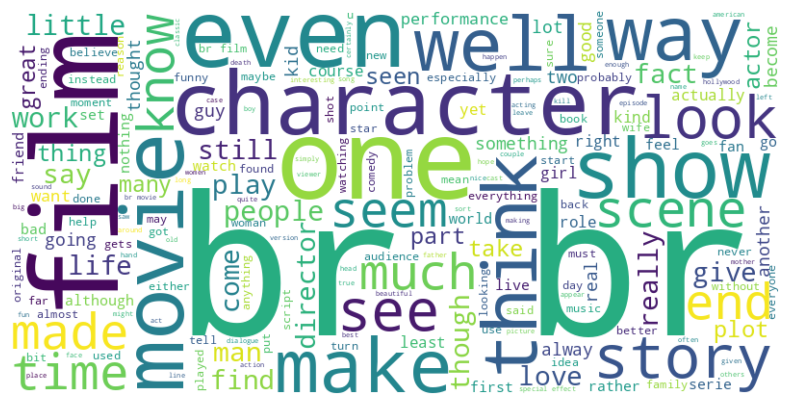

In [ ]:
# Ensure NLTK data is downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Assuming 'df' is your DataFrame
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.isalpha() and token not in stop_words]

    # Lemmatization (optional)
    # You may need to download the WordNet dataset for lemmatization
    # nltk.download('wordnet')
    # lemmatizer = nltk.WordNetLemmatizer()
    # tokens = [lemmatizer.lemmatize(token) for token in tokens]

    return ' '.join(tokens)

# Apply text preprocessing to the 'headline' column
df['processed_review'] = df['review'].apply(preprocess_text)



# Word Frequency Analysis
def word_frequency_analysis(text):
    # Your word frequency analysis code here
    # Example: Calculate and plot word frequencies
    word_frequencies = nltk.FreqDist(word_tokenize(text))
    word_frequencies.plot(30, cumulative=False)

# Sentiment Analysis
'''
def sentiment_analysis(text):
    # Your sentiment analysis code here
    # Example: Use a sentiment analysis library like TextBlob or Vader
    sentiment = TextBlob(text).sentiment
    print(f'Sentiment: {sentiment}')
    '''

# Word Cloud Visualization
def generate_word_cloud(text):
    # Your word cloud generation code here
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Example of how to use the processed text for word frequency analysis
# Replace 'processed_headline' with 'processed_short_description' if needed
word_frequency_analysis(df['processed_review'].str.cat(sep=' '))

# Example of how to use the processed text for sentiment analysis
# Replace 'processed_headline' with 'processed_short_description' if needed


# Example of how to generate a word cloud
# Replace 'processed_headline' with 'processed_short_description' if needed
generate_word_cloud(df['processed_review'].str.cat(sep=' '))

# SENTIMENT ANALYSIS WITH  LDA TOPIC MODELLING

In [ ]:
# Ensure NLTK data is downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Assuming 'df' is your DataFrame
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.isalpha() and token not in stop_words]

    # Lemmatization (optional)
    # You may need to download the WordNet dataset for lemmatization
    # nltk.download('wordnet')
    # lemmatizer = nltk.WordNetLemmatizer()
    # tokens = [lemmatizer.lemmatize(token) for token in tokens]

    return ' '.join(tokens)

# Apply text preprocessing to the 'headline' column
df['processed_review'] = df['review'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
%pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.2 MB/s eta 0:00:00


# Finding coherence score to pick suitable no of topics

In [ ]:
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

# Preprocessing function
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Convert tokens to lowercase
    tokens = [token.lower() for token in tokens]
    # Remove punctuation
    tokens = [token for token in tokens if token not in string.punctuation]
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    return tokens

# Preprocess the documents
documents = df['processed_review'].apply(preprocess_text).tolist()

# Create a dictionary representation of the documents
dictionary = Dictionary(documents)

# Filter out words that occur less than 20 documents, or more than 50% of the documents
dictionary.filter_extremes(no_below=20, no_above=0.5)

# Create a bag-of-words representation of the documents
corpus = [dictionary.doc2bow(doc) for doc in documents]

# Function to calculate coherence score for a given number of topics
def calculate_coherence_score(corpus, dictionary, texts, num_topics):
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
    coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    return coherence_model.get_coherence()

# Try different numbers of topics and calculate coherence scores
num_topics_list = [5, 10, 15, 20, 25, 30, 35]
coherence_scores = []

for num_topics in num_topics_list:
    coherence_score = calculate_coherence_score(corpus, dictionary, documents, num_topics)
    coherence_scores.append(coherence_score)

# Print coherence scores for different numbers of topics
for num_topics, coherence_score in zip(num_topics_list, coherence_scores):
    print(f"Number of topics: {num_topics}, Coherence Score: {coherence_score}")


Number of topics: 5, Coherence Score: 0.2884960880988272
Number of topics: 10, Coherence Score: 0.31050333679900743
Number of topics: 15, Coherence Score: 0.3207585451082174
Number of topics: 20, Coherence Score: 0.33474425772898264
Number of topics: 25, Coherence Score: 0.33244197084971455
Number of topics: 30, Coherence Score: 0.34380731744771753
Number of topics: 35, Coherence Score: 0.32607824663554713


In [ ]:
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

# Preprocessing function
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Convert tokens to lowercase
    tokens = [token.lower() for token in tokens]
    # Remove punctuation
    tokens = [token for token in tokens if token not in string.punctuation]
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    return tokens

# Preprocess the documents
documents = df['processed_review'].apply(preprocess_text).tolist()

# Sentiment score for each topic

In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.models import CoherenceModel
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords

# Download NLTK resources if not already downloaded
nltk.download('vader_lexicon')
nltk.download('stopwords')

# Load NLTK's English stopwords
stop_words = set(stopwords.words('english'))

# Load your DataFrame
# Assuming df contains your data

# Preprocessing function
def preprocess(text):
    return [word for word in simple_preprocess(str(text), deacc=True) if word not in stop_words]

# Preprocess short descriptions
processed_review = df['review'].map(preprocess)

# Create a dictionary representation of the documents
dictionary = Dictionary(processed_review)

# Filter out words that occur less than 10 documents, or more than 20% of the documents
dictionary.filter_extremes(no_below=10, no_above=0.2)

# Create Bag-of-words representation of the documents
corpus = [dictionary.doc2bow(text) for text in processed_review]

# Set the number of topics
num_topics = 30

# Build LDA model
lda_model = LdaModel(corpus=corpus,
                     id2word=dictionary,
                     num_topics=num_topics,
                     random_state=42,
                     passes=10,
                     alpha='auto',
                     per_word_topics=True)

# Analyze Sentiment per Topic using VADER
analyzer = SentimentIntensityAnalyzer()

# Initialize dictionary to store sentiment scores per topic
topic_sentiment = {}

# Function to calculate sentiment scores for a given text
def calculate_sentiment_scores(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment['compound']

# Iterate over topics
for topic_idx in range(num_topics):
    topic_words = [word for word, _ in lda_model.show_topic(topic_idx, topn=20)]  # Extract top words for the topic
    topic_text = " ".join(topic_words)  # Concatenate top words into a single string
    sentiment_score = calculate_sentiment_scores(topic_text)  # Calculate sentiment score for the topic text
    topic_sentiment[topic_idx] = sentiment_score

# Print topic sentiment information
print("Topic Sentiment:")
for topic_idx, sentiment_score in topic_sentiment.items():
    print(f"Topic {topic_idx+1}: Sentiment Score: {sentiment_score}")


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Topic Sentiment:
Topic 1: Sentiment Score: 0.7579
Topic 2: Sentiment Score: 0.0
Topic 3: Sentiment Score: -0.1027
Topic 4: Sentiment Score: -0.6249
Topic 5: Sentiment Score: -0.5719
Topic 6: Sentiment Score: -0.5574
Topic 7: Sentiment Score: 0.0
Topic 8: Sentiment Score: 0.4019
Topic 9: Sentiment Score: 0.7984
Topic 10: Sentiment Score: -0.9607
Topic 11: Sentiment Score: 0.9633
Topic 12: Sentiment Score: 0.9442
Topic 13: Sentiment Score: -0.5574
Topic 14: Sentiment Score: -0.6908
Topic 15: Sentiment Score: 0.34
Topic 16: Sentiment Score: -0.7783
Topic 17: Sentiment Score: 0.0
Topic 18: Sentiment Score: 0.4472
Topic 19: Sentiment Score: -0.1779
Topic 20: Sentiment Score: -0.9578
Topic 21: Sentiment Score: 0.0516
Topic 22: Sentiment Score: 0.0
Topic 23: Sentiment Score: -0.5267
Topic 24: Sentiment Score: 0.3818
Topic 25: Sentiment Score: -0.9628
Topic 26: Sentiment Score: 0.4019
Topic 27: Sentiment Score: 0.0
Topic 28: Sentiment Score: 0.7269
Topic 29: Sentiment Score: -0.9829
Topic 30: 

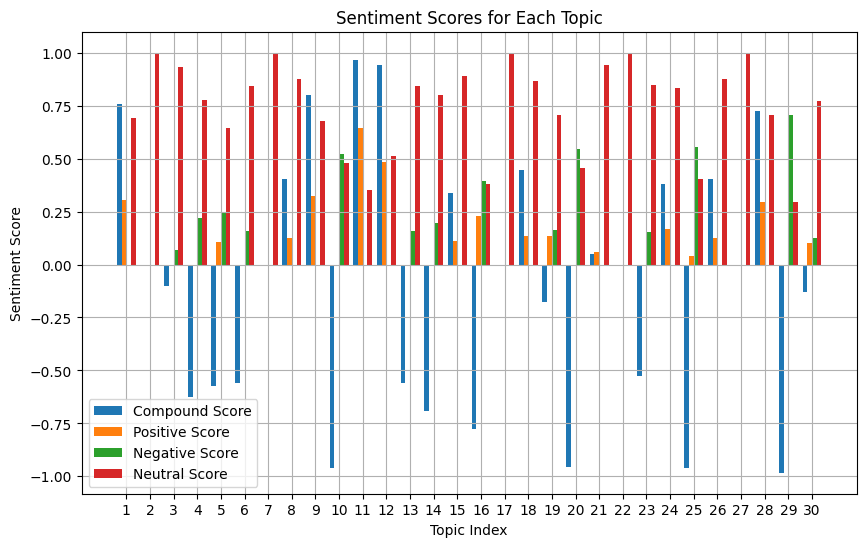

In [50]:
import matplotlib.pyplot as plt

# Extract sentiment scores for each topic
compound_scores = [sentiment_scores['compound'] for sentiment_scores in topic_sentiment.values()]
positive_scores = [sentiment_scores['positive'] for sentiment_scores in topic_sentiment.values()]
negative_scores = [sentiment_scores['negative'] for sentiment_scores in topic_sentiment.values()]
neutral_scores = [sentiment_scores['neutral'] for sentiment_scores in topic_sentiment.values()]

# Topic indices
topic_indices = range(1, num_topics + 1)

# Width of each bar
bar_width = 0.2

# Plotting
plt.figure(figsize=(10, 6))

plt.bar([i - 1.5 * bar_width for i in topic_indices], compound_scores, label='Compound Score', width=bar_width)
plt.bar([i - 0.5 * bar_width for i in topic_indices], positive_scores, label='Positive Score', width=bar_width)
plt.bar([i + 0.5 * bar_width for i in topic_indices], negative_scores, label='Negative Score', width=bar_width)
plt.bar([i + 1.5 * bar_width for i in topic_indices], neutral_scores, label='Neutral Score', width=bar_width)

plt.xlabel('Topic Index')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Scores for Each Topic')
plt.legend()
plt.grid(True)
plt.xticks(topic_indices)
plt.show()

# Mapping reviews with it's respective topic

In [24]:
from gensim import corpora, models
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Assuming 'df' is your DataFrame with a column 'processed_headline'
documents = df['processed_review'].tolist()

# Tokenize and remove stopwords
tokenized_docs = [word_tokenize(doc.lower()) for doc in documents]
stop_words = set(stopwords.words('english'))
tokenized_docs = [[token for token in doc if token.isalpha() and token not in stop_words] for doc in tokenized_docs]

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(tokenized_docs)

# Filter out words that appear in less than 5 documents or more than 50% of the documents
dictionary.filter_extremes(no_below=5, no_above=0.5)

# Convert the documents to a bag-of-words representation
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

# Build the LDA model
lda_model = models.LdaModel(corpus, num_topics=15, id2word=dictionary, passes=15)

# Print the topics and their top words
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.059*"comedy" + 0.047*"funny" + 0.019*"game" + 0.015*"humor" + 0.015*"jokes"')
(1, '0.014*"family" + 0.013*"father" + 0.013*"school" + 0.012*"mother" + 0.010*"son"')
(2, '0.029*"horror" + 0.009*"effects" + 0.007*"gore" + 0.007*"dead" + 0.007*"house"')
(3, '0.020*"police" + 0.018*"murder" + 0.013*"killer" + 0.013*"crime" + 0.011*"cop"')
(4, '0.011*"films" + 0.006*"time" + 0.006*"first" + 0.006*"much" + 0.006*"also"')
(5, '0.010*"action" + 0.008*"island" + 0.007*"western" + 0.006*"ship" + 0.006*"hero"')
(6, '0.021*"bad" + 0.014*"even" + 0.014*"acting" + 0.012*"plot" + 0.009*"script"')
(7, '0.016*"story" + 0.011*"characters" + 0.011*"life" + 0.010*"character" + 0.008*"love"')
(8, '0.016*"war" + 0.013*"people" + 0.011*"american" + 0.009*"would" + 0.008*"world"')
(9, '0.023*"great" + 0.018*"good" + 0.014*"best" + 0.013*"well" + 0.012*"cast"')
(10, '0.043*"show" + 0.024*"series" + 0.015*"tv" + 0.015*"episode" + 0.011*"first"')
(11, '0.020*"like" + 0.014*"really" + 0.012*"would" + 0.012

## Analyze sentiment for each document based on its dominant topic

In [32]:

def analyze_sentiment_for_topic(row):
    topic_id = row['dominant_topic']
    if topic_id < num_topics:
        topic_words = [word for word, _ in lda_model.show_topic(topic_id, topn=20)]
        topic_text = " ".join(topic_words)
        return analyzer.polarity_scores(row['review'])['compound']
    else:
        return None

df['sentiment_for_dominant_topic'] = df.apply(analyze_sentiment_for_topic, axis=1)

# Print the results
print(df[['review', 'dominant_topic', 'sentiment_for_dominant_topic']])


                                                  review  dominant_topic  \
0      One of the other reviewers has mentioned that ...               3   
1      A wonderful little production. <br /><br />The...               4   
2      I thought this was a wonderful way to spend ti...              11   
3      Basically there's a family where a little boy ...               2   
4      Petter Mattei's "Love in the Time of Money" is...               7   
...                                                  ...             ...   
49995  I thought this movie did a down right good job...              11   
49996  Bad plot, bad dialogue, bad acting, idiotic di...              11   
49997  I am a Catholic taught in parochial elementary...               1   
49998  I'm going to have to disagree with the previou...               4   
49999  No one expects the Star Trek movies to be high...              11   

       sentiment_for_dominant_topic  
0                           -0.9916  
1          

# EVALUTATION METRIC

## Finding the suitable threshold value

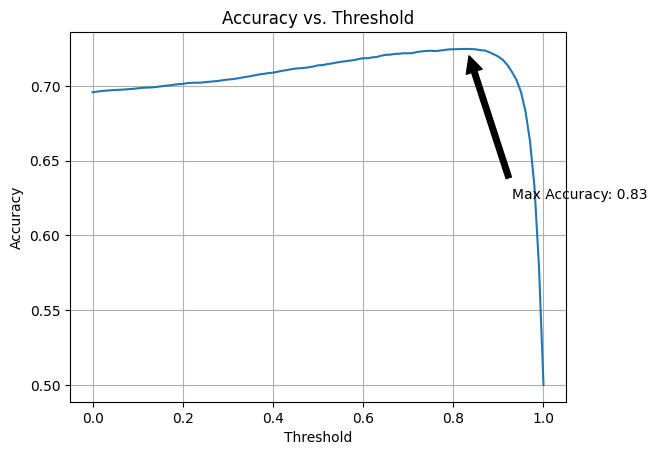

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Define a range of threshold values
threshold_values = np.linspace(0, 1, 101)  # Adjust the number of threshold values as needed

# Initialize lists to store accuracy values
accuracy_values = []

# Iterate over each threshold value
for threshold in threshold_values:
    # Label sentiment scores for dominant topic as positive or negative using the current threshold
    predicted_sentiment_labels = ['positive' if score >= threshold else 'negative' for score in df['sentiment_for_dominant_topic']]

    # Calculate accuracy
    accuracy = accuracy_score(actual_sentiment_labels, predicted_sentiment_labels)

    # Append accuracy to the list
    accuracy_values.append(accuracy)

# Find the threshold value corresponding to maximum accuracy
max_accuracy_index = np.argmax(accuracy_values)
max_accuracy_threshold = threshold_values[max_accuracy_index]

# Plot accuracy vs. threshold
plt.plot(threshold_values, accuracy_values)
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Threshold')
plt.grid(True)

# Annotate the maximum accuracy value on the plot
plt.annotate(f'Max Accuracy: {max_accuracy_threshold:.2f}', xy=(max_accuracy_threshold, max(accuracy_values)), xytext=(max_accuracy_threshold + 0.1, max(accuracy_values) - 0.1), arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()


## Evaluation Metric

In [47]:
# Define threshold for classifying sentiment scores
threshold = 0.83  # You can adjust this threshold

# Label sentiment scores for dominant topic as positive or negative
predicted_sentiment_labels = ['positive' if score >= threshold else 'negative' for score in df['sentiment_for_dominant_topic']]

# Compare predicted labels with actual labels
actual_sentiment_labels = df['sentiment']  # Assuming you have actual sentiment labels in the DataFrame

# Calculate evaluation metrics
accuracy = accuracy_score(actual_sentiment_labels, predicted_sentiment_labels)
precision = precision_score(actual_sentiment_labels, predicted_sentiment_labels, pos_label='positive')
recall = recall_score(actual_sentiment_labels, predicted_sentiment_labels, pos_label='positive')
f1 = f1_score(actual_sentiment_labels, predicted_sentiment_labels, pos_label='positive')

# Print evaluation metrics
print("Evaluation Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


Evaluation Metrics:
Accuracy: 0.72464
Precision: 0.7234245703373647
Recall: 0.72736
F1-score: 0.7253869475027924


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(actual_sentiment_labels, predicted_sentiment_labels, labels=['negative', 'positive'])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blacks', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Sentiment')
plt.ylabel('Actual Sentiment')
plt.title('Confusion Matrix')
plt.show()


In [59]:
# Preprocess user input
def preprocess_user_input(text):
    return [word for word in simple_preprocess(str(text), deacc=True) if word not in stop_words]

# Get user input
user_input = input("Enter your text: ")

# Preprocess user input
user_processed_review = preprocess_user_input(user_input)

# Create Bag-of-words representation of the user input
user_corpus = [dictionary.doc2bow(user_processed_review)]

# Infer topics for the user input
user_topic_probabilities = [lda_model.get_document_topics(doc) for doc in user_corpus]

# Analyze sentiment per topic for the user input
user_topic_sentiments = []
for topic_probs in user_topic_probabilities:
    sentiment_scores = []
    for topic_idx, prob in topic_probs:
        topic_words = [word for word, _ in lda_model.show_topic(topic_idx, topn=20)]
        topic_text = " ".join(topic_words)
        sentiment_score = calculate_sentiment_scores(topic_text)
        sentiment_scores.append(sentiment_score)
    user_topic_sentiments.append(sentiment_scores)

# Aggregate sentiment scores for the user input
user_document_sentiments = []
for topic_probs in user_topic_probabilities:
    #weighted_sentiments = [sentiment * prob for sentiment, (_, prob) in zip(sentiment_scores, topic_probs)]
    weighted_sentiments = [sentiment[0] * prob for sentiment, (_, prob) in zip(sentiment_scores, topic_probs)]
    total_sentiment = sum(weighted_sentiments)
    user_document_sentiments.append(total_sentiment)

# Print sentiment analysis results for the user input
print("Sentiment Analysis Results:")
for idx, sentiment_score in enumerate(user_document_sentiments):
    print(f"Document {idx + 1}: Sentiment Score: {sentiment_score}")


Enter your text: this is so funny
Sentiment Analysis Results:
Document 1: Sentiment Score: 0.47250174911394716


# SENTIMENT ANALYSIS WITHOUT TOPIC MODELLING

In [51]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Assuming your dataframe is named 'df'

# 1. Preprocessing
# - Handle missing values
# - Tokenize text (e.g., split into words)
# - Remove stop words
# - Perform stemming or lemmatization

# 2. Sentiment Analysis without Topic Modeling
analyzer = SentimentIntensityAnalyzer()
sentiment_scores = df['processed_review'].apply(analyzer.polarity_scores)
df['sentiment_compound'] = sentiment_scores.apply(lambda x: x['compound'])

# Print sentiment information
print("Overall Sentiment Without Topic Modeling:")
print(df['sentiment_compound'].describe())

Overall Sentiment Without Topic Modeling:
count    50000.000000
mean         0.369780
std          0.766789
min         -0.999400
25%         -0.440175
50%          0.855500
75%          0.970800
max          0.999800
Name: sentiment_compound, dtype: float64


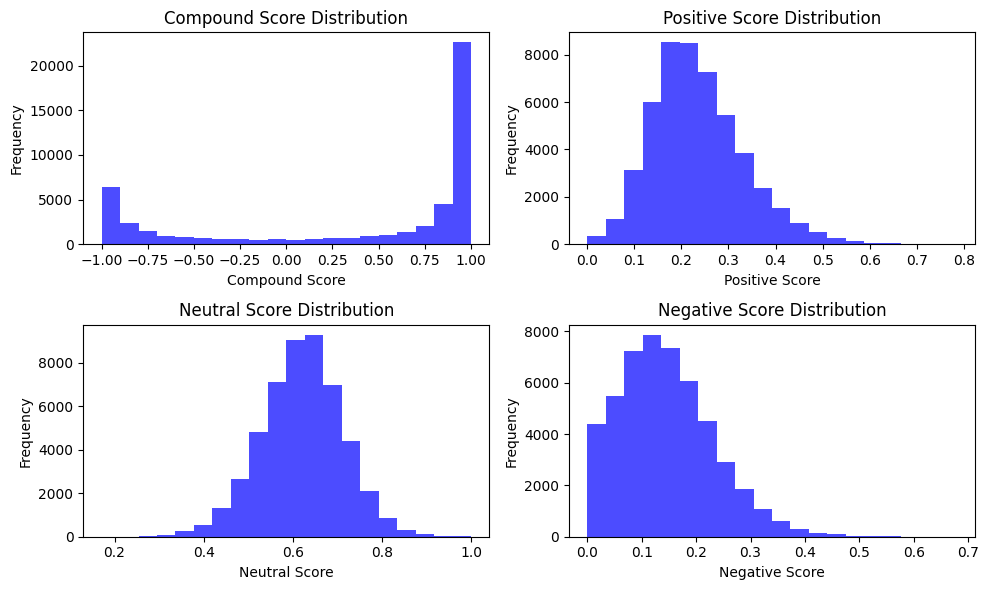

In [20]:
import matplotlib.pyplot as plt

# Assuming 'sentiment_scores' is a DataFrame with columns 'compound', 'positive', 'neutral', 'negative'
sentiment_scores = df['processed_review'].apply(analyzer.polarity_scores)
sentiment_scores_df = pd.DataFrame(sentiment_scores.tolist())

# Plotting
plt.figure(figsize=(10, 6))

# Plot compound score distribution
plt.subplot(2, 2, 1)
plt.hist(sentiment_scores_df['compound'], bins=20, color='blue', alpha=0.7)
plt.title('Compound Score Distribution')
plt.xlabel('Compound Score')
plt.ylabel('Frequency')

# Plot positive score distribution
plt.subplot(2, 2, 2)
plt.hist(sentiment_scores_df['pos'], bins=20, color='blue', alpha=0.7)
plt.title('Positive Score Distribution')
plt.xlabel('Positive Score')
plt.ylabel('Frequency')

# Plot neutral score distribution
plt.subplot(2, 2, 3)
plt.hist(sentiment_scores_df['neu'], bins=20, color='blue', alpha=0.7)
plt.title('Neutral Score Distribution')
plt.xlabel('Neutral Score')
plt.ylabel('Frequency')

# Plot negative score distribution
plt.subplot(2, 2, 4)
plt.hist(sentiment_scores_df['neg'], bins=20, color='blue', alpha=0.7)
plt.title('Negative Score Distribution')
plt.xlabel('Negative Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


<ipython-input-15-c2a6a61e4b43>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sentiment_scores_df['compound'], color='grey', label='Compound Score', shade=True)
<ipython-input-15-c2a6a61e4b43>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sentiment_scores_df['pos'], color='green', label='Positive Score', shade=True)
<ipython-input-15-c2a6a61e4b43>:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sentiment_scores_df['neu'], color='orange', label='Neutral Score', shade=True)
<ipython-input-15-c2a6a61e4b43>:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an er

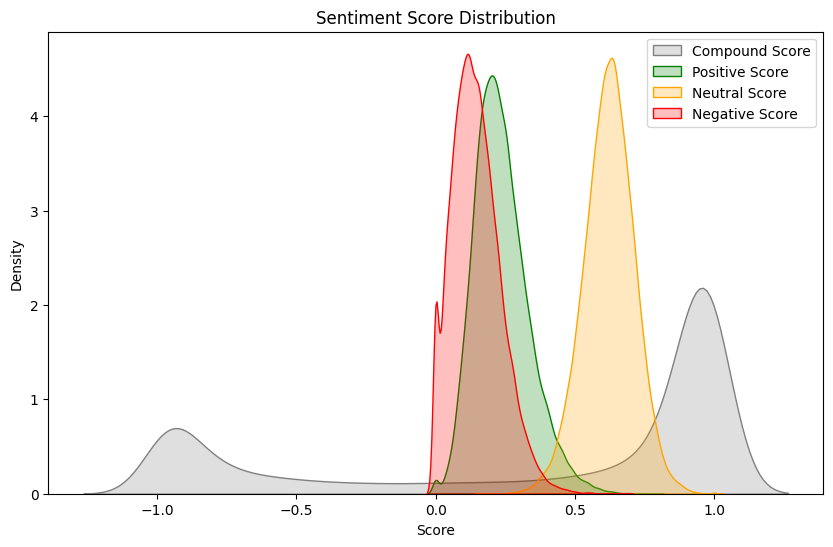

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'sentiment_scores_df' contains columns 'compound', 'pos', 'neu', 'neg'
plt.figure(figsize=(10, 6))

# Plot KDE for compound score
sns.kdeplot(sentiment_scores_df['compound'], color='grey', label='Compound Score', shade=True)

# Plot KDE for positive score
sns.kdeplot(sentiment_scores_df['pos'], color='green', label='Positive Score', shade=True)

# Plot KDE for neutral score
sns.kdeplot(sentiment_scores_df['neu'], color='orange', label='Neutral Score', shade=True)

# Plot KDE for negative score
sns.kdeplot(sentiment_scores_df['neg'], color='red', label='Negative Score', shade=True)

plt.title('Sentiment Score Distribution')
plt.xlabel('Score')
plt.ylabel('Density')
plt.legend()
plt.show()


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

# Calculate sentiment scores
sentiment_scores = df['processed_review'].apply(analyzer.polarity_scores)

# Extract individual scores
compound_score = sentiment_scores.apply(lambda x: x['compound'])
positive_score = sentiment_scores.apply(lambda x: x['pos'])
neutral_score = sentiment_scores.apply(lambda x: x['neu'])
negative_score = sentiment_scores.apply(lambda x: x['neg'])

# Print Overall Sentiment Information
print("Overall Sentiment Without Topic Modeling:")
print(f"Compound Score: {compound_score.mean()}")
print(f"Positive Score: {positive_score.mean()}")
print(f"Neutral Score: {neutral_score.mean()}")
print(f"Negative Score: {negative_score.mean()}")


Overall Sentiment Without Topic Modeling:
Compound Score: 0.369780038
Positive Score: 0.2350223
Neutral Score: 0.6204845
Negative Score: 0.14449267999999998


In [ ]:
print(sentiment_scores)

0        {'neg': 0.306, 'neu': 0.585, 'pos': 0.108, 'co...
1        {'neg': 0.079, 'neu': 0.663, 'pos': 0.258, 'co...
2        {'neg': 0.154, 'neu': 0.555, 'pos': 0.291, 'co...
3        {'neg': 0.221, 'neu': 0.646, 'pos': 0.134, 'co...
4        {'neg': 0.03, 'neu': 0.717, 'pos': 0.253, 'com...
                               ...                        
49995    {'neg': 0.087, 'neu': 0.569, 'pos': 0.344, 'co...
49996    {'neg': 0.327, 'neu': 0.445, 'pos': 0.228, 'co...
49997    {'neg': 0.236, 'neu': 0.564, 'pos': 0.2, 'comp...
49998    {'neg': 0.155, 'neu': 0.708, 'pos': 0.137, 'co...
49999    {'neg': 0.099, 'neu': 0.638, 'pos': 0.262, 'co...
Name: processed_review, Length: 50000, dtype: object


In [ ]:
# Calculate Overall Sentiment
overall_sentiment = {
    'compound': sum(sentiment['compound'] for sentiment in topic_sentiment.values()) / num_topics,
    'positive': sum(sentiment['positive'] for sentiment in topic_sentiment.values()) / num_topics,
    'neutral': sum(sentiment['neutral'] for sentiment in topic_sentiment.values()) / num_topics,
    'negative': sum(sentiment['negative'] for sentiment in topic_sentiment.values()) / num_topics,
}

# Print Overall Sentiment
print("\nOverall Sentiment with Topic Modelling:")
print(f"Compound Score: {overall_sentiment['compound']}")
print(f"Positive Score: {overall_sentiment['positive']}")
print(f"Neutral Score: {overall_sentiment['neutral']}")
print(f"Negative Score: {overall_sentiment['negative']}")


Overall Sentiment with Topic Modelling:
Compound Score: -0.07883666666666665
Positive Score: 0.11286666666666667
Neutral Score: 0.7467666666666666
Negative Score: 0.14033333333333334


# EVALUATION METRIC (WITHOUT TOPIC MODELLING)

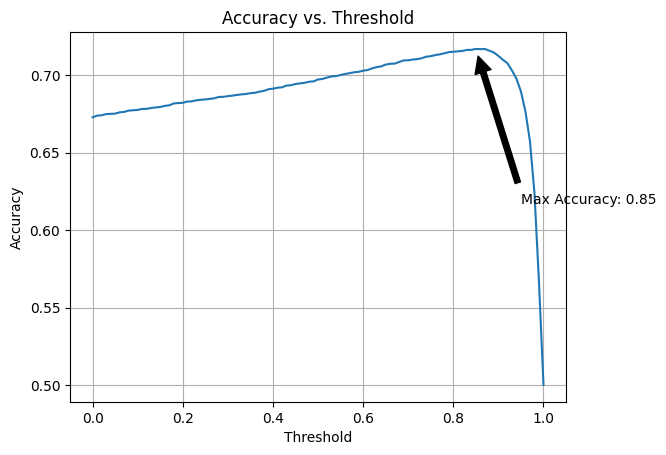

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Define a range of threshold values
threshold_values = np.linspace(0, 1, 101)  # Adjust the number of threshold values as needed

# Initialize lists to store accuracy values
accuracy_values = []

# Iterate over each threshold value
for threshold in threshold_values:
    # Label sentiment scores for dominant topic as positive or negative using the current threshold
    predicted_sentiment_labels = ['positive' if score >= threshold else 'negative' for score in df['sentiment_compound']]

    # Calculate accuracy
    accuracy = accuracy_score(actual_sentiment_labels, predicted_sentiment_labels)

    # Append accuracy to the list
    accuracy_values.append(accuracy)

# Find the threshold value corresponding to maximum accuracy
max_accuracy_index = np.argmax(accuracy_values)
max_accuracy_threshold = threshold_values[max_accuracy_index]

# Plot accuracy vs. threshold
plt.plot(threshold_values, accuracy_values)
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Threshold')
plt.grid(True)

# Annotate the maximum accuracy value on the plot
plt.annotate(f'Max Accuracy: {max_accuracy_threshold:.2f}', xy=(max_accuracy_threshold, max(accuracy_values)), xytext=(max_accuracy_threshold + 0.1, max(accuracy_values) - 0.1), arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

Evaluation Metrics:
Accuracy: 0.7171
Precision: 0.714771872897788
Recall: 0.72252
F1-score: 0.7186250522169841


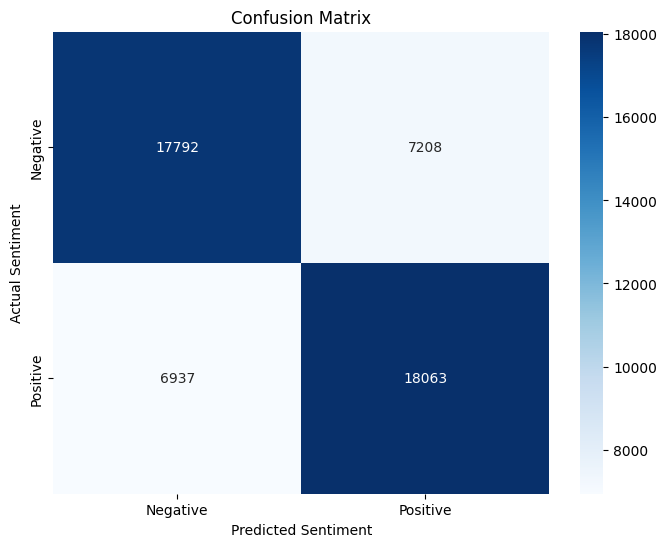

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define threshold for converting sentiment scores to labels
threshold = 0.85 # You can adjust this threshold based on your preference

# Function to convert sentiment scores to labels
def score_to_label(score, threshold):
    if score >= threshold:
        return 'positive'
    else:
        return 'negative'

# Convert sentiment scores to labels for actual and predicted sentiments
actual_sentiment_labels = ['positive' if sentiment == 'positive' else 'negative' for sentiment in df['sentiment']]
predicted_sentiment_labels = [score_to_label(score, threshold) for score in df['sentiment_compound']]

# Evaluate performance using metrics
accuracy = accuracy_score(actual_sentiment_labels, predicted_sentiment_labels)
precision = precision_score(actual_sentiment_labels, predicted_sentiment_labels, pos_label='positive')
recall = recall_score(actual_sentiment_labels, predicted_sentiment_labels, pos_label='positive')
f1 = f1_score(actual_sentiment_labels, predicted_sentiment_labels, pos_label='positive')

# Print evaluation metrics
print("Evaluation Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")



# Compute confusion matrix
conf_matrix = confusion_matrix(actual_sentiment_labels, predicted_sentiment_labels, labels=['negative', 'positive'])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Sentiment')
plt.ylabel('Actual Sentiment')
plt.title('Confusion Matrix')
plt.show()
